# Precios medios de Gasolina y Gasóleo por Rótulos

In [103]:
import pandas as pd
import matplotlib.pyplot as plt

In [104]:
gasolina = './precios_gasolina.csv'
gasoleo = './precios_gasoleo.csv'

def comparativa_precios(gasolina, gasoleo):
    # Leer los archivos previamente guardados como ".csv":
    dfgasolina = pd.read_csv(gasolina, sep=";")
    dfgasoleo = pd.read_csv(gasoleo, sep=";")
       
    # Convertir las comas a puntos y de texto a numero:
    dfgasoleo["Precio"] = dfgasoleo["Precio"].str.replace(",", ".").astype(float)
    dfgasolina["Precio"] = dfgasolina["Precio"].str.replace(",", ".").astype(float)
    
    # Calcular la media de una columna en cada archivo
    rotulos = ['BALLENOIL', 'BP', 'CEPSA', 'GALP', 'REPSOL', 'SHELL']
    rotulo_filtro_gasoleo = dfgasoleo.loc[dfgasoleo['Rótulo'].isin(rotulos)]
    rotulo_filtro_gasolina = dfgasolina.loc[dfgasolina['Rótulo'].isin(rotulos)]
    promedio_rotulos_gasolina = rotulo_filtro_gasolina.groupby('Rótulo')['Precio'].mean()
    promedio_rotulos_gasoleo = rotulo_filtro_gasoleo.groupby('Rótulo')['Precio'].mean()
    
    tabla = pd.DataFrame({'Precio medio gasolina': promedio_rotulos_gasolina,
                          'Precio medio gasoleo': promedio_rotulos_gasoleo})
    
    # Crear un gráfico de barras con las columnas de datos
    tabla.plot(kind='bar', width=0.8, align='center')
    plt.xticks(range(len(tabla)), rotulos)

    # Establecer los límites del eje y
    plt.ylim(1.3, 1.8)

    # Etiquetas de los ejes y título del gráfico
    plt.ylabel('Precio')
    plt.xlabel('Rótulos')
    plt.title('Precio medio por Rótulos')

    # Mostrar el gráfico
    plt.show()

    return tabla

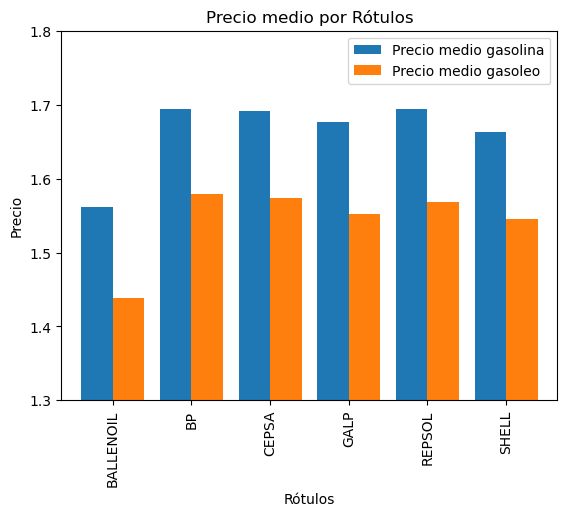

,Precio medio gasolina,Precio medio gasoleo
Rótulo,,
BALLENOIL,1.561929,1.437980
BP,1.693653,1.579287
CEPSA,1.691442,1.573762
GALP,1.676444,1.552244
REPSOL,1.693526,1.568864
SHELL,1.663510,1.544664


In [105]:
comparativa_precios(gasolina, gasoleo)